In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from task3module.task3module import *
mpl.style.use('classic')
plt.figure(figsize=(8, 6), dpi = 80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
%matplotlib inline

In [3]:
np.random.seed(43)

In [4]:
N = 101
x = np.linspace(0, 1, N)
alpha = 0.785
beta = 0.31
y = alpha*x + beta + np.random.normal(size = N)

Target function is $$ D(a,b) = \sum_{k=0}^{100}(F(a,b,x_k)-y_k)^2 $$

Approximant is $$ F(a, b, x) = ax+b$$
$$ \frac{\partial D}{\partial a} = 2 \sum_{k=0}^{100}x_k(ax_k+b-y_k),\ \frac{\partial D}{\partial b} = 2\sum_{k=0}^{100}(ax_k+b-y_k) $$
$$ \frac{\partial^2 D}{\partial a^2} = 2\sum_{k=0}^{100}x^2_k,\ \frac{\partial^2 D}{\partial a \partial b} = 2\sum_{k=0}^{100}x_k y_k,\ \frac{\partial^2 D}{\partial b^2} = 202 $$

In [5]:
def cost_function(a, b):
    y_pred = a*x+b
    return squares(y_pred, y)

def cost_function_v(theta):
    return cost_function(theta[0], theta[1])

def cost_function_grad(theta):
    df1 = 2*np.sum(x*(theta[0]*x+theta[1]-y))
    df2 = 2*np.sum(theta[0]*x+theta[1]-y)
    return np.array([df1, df2], dtype=float)

def cost_function_hess(theta):
    df11 = 2*np.sum(np.square(x))
    df12 = 2*np.sum(x)
    df22 = 2*x.shape[0]
    return np.array([[df11, df12], [df12, df22]], dtype=float)


In [6]:
xlist = np.linspace(0, 1.0, 301)
ylist = np.linspace(0, 1.0, 301)
X, Y = np.meshgrid(xlist, ylist)

Contour plot for $D(a, b)$

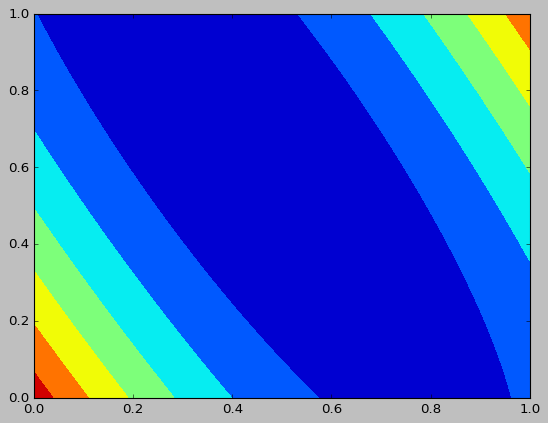

In [7]:
Z = np.array([[cost_function(x, y) for y in ylist] for x in xlist])
plt.contourf(X, Y, Z)

In [8]:
limits = np.array([[0, 1], [0, 1]], dtype=float)

In [9]:
newans = newtons(cost_function_v, limits, np.array([0.1, 0.1]), funcgrad=cost_function_grad,
        funchess=cost_function_hess, optpoint = np.array([alpha, beta]))
newans

(array([0.68456203, 0.42617877]),
 92.14858746546793,
 {'iterations': 2,
  'funccalcs': 0,
  'gradcalcs': 2,
  'hesscalcs': 2,
  'matrixinversions': 2},
 0.15357504216757092)

In [10]:
lmans1 = levenmarq(cost_function_v, limits, np.array([0.1, 0.1]), funcgrad=cost_function_grad,
          funchess=cost_function_hess, regulpar=1., optpoint = np.array([alpha, beta]))
lmans1

(array([0.68455491, 0.42618259]),
 92.14858746590969,
 {'iterations': 4,
  'funccalcs': 0,
  'gradcalcs': 4,
  'hesscalcs': 4,
  'matrixinversions': 4},
 0.15358258467357028)

In [11]:
lmans2 = levenmarq(cost_function_v, limits, np.array([0.1, 0.1]), funcgrad=cost_function_grad,
          funchess=cost_function_hess, regulpar=(0., 10.), optpoint = np.array([alpha, beta]))
lmans2

(array([0.68456203, 0.42617877]),
 92.14858746546791,
 {'iterations': 2,
  'funccalcs': 46,
  'gradcalcs': 2,
  'hesscalcs': 2,
  'matrixinversions': 42},
 0.1535750423681571)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11696\231367179.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(np.linspace(0.9999, 1., 11), rotation = -45)


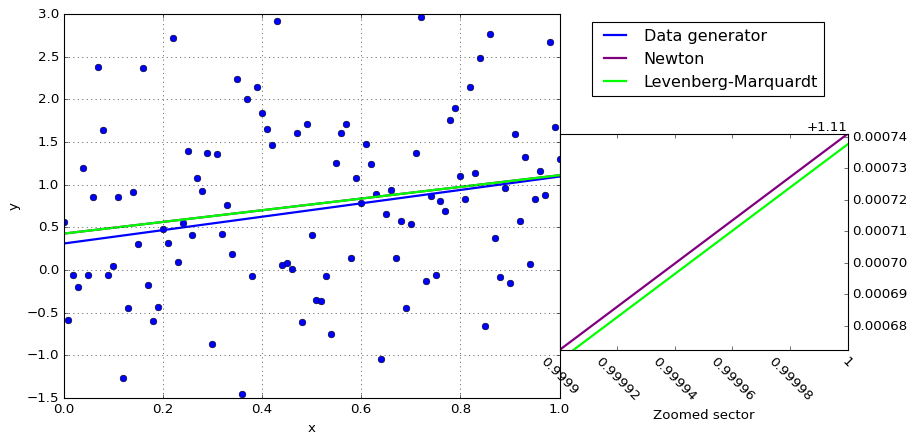

In [12]:
fig = plt.figure(facecolor="white")
ax = fig.add_subplot(1, 1, 1)
plt.plot(x, y, "bo")
plt.axline((0, beta), slope = alpha, color = "blue", linewidth = 2, label= "Data generator")
plt.axline((0, newans[0][1]), slope = newans[0][0], color = "purple", linewidth = 2, label= "Newton")
plt.axline((0, lmans1[0][1]), slope = lmans1[0][0], color = "lime", linewidth = 2, label= "Levenberg-Marquardt")
#plt.axline((0, nmans.x[1]), slope = nmans.x[0], color = "red", linewidth = 2, label= "Nelder-Mead")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation = 45)
ax.grid(True)

f = lambda x: newans[0][1] + newans[0][0]*x

axes = plt.axes([.90, .2, .45, .45])
axes.plot(x, y, "bo")
axes.set_xlim((0.9999, 1.))
axes.set_ylim((f(0.9999), f(1.)))
axes.yaxis.tick_right()
axes.axline((0, beta), slope = alpha, color = "blue", linewidth = 2, label= "Data generator")
axes.axline((0, newans[0][1]), slope = newans[0][0], color = "purple", linewidth = 2, label= "Exhaustive search")
axes.axline((0, lmans1[0][1]), slope = lmans1[0][0], color = "lime", linewidth = 2, label= "Gauss")
#axes.axline((0, nmans.x[1]), slope = nmans.x[0], color = "red", linewidth = 2, label= "Nelder-Mead")
axes.set_xlabel("Zoomed sector")
axes.set_xticklabels(np.linspace(0.9999, 1., 11), rotation = -45)
axes.xaxis.set_major_formatter(plt.FormatStrFormatter('%g'))

Approximant is $$ F(a, b, x) = \frac{a}{1+bx}$$
$$ \frac{\partial D}{\partial a} = 2 \sum_{k=0}^{100}\frac{1}{1+bx_k}\left(\frac{a}{1+bx_k}-y_k\right),\ \frac{\partial D}{\partial b} = -2\sum_{k=0}^{100} \frac{ax_k}{(1+bx_k)^2}\left(\frac{a}{1+bx_k}-y_k\right) $$
$$ \frac{\partial^2 D}{\partial a^2} = 2\sum_{k=0}^{100} \frac{1}{(1+bx_k)^2},$$ $$ \frac{\partial^2 D}{\partial a \partial b} = 2\sum_{k=0}^{100} \frac{1}{(1+bx_k)^2} \left( \frac{-2ax_k}{1+bx_k} + x_ky_k \right),$$ $$ \frac{\partial^2 D}{\partial b^2} = 2\sum_{k=0}^{100} \frac{a^2}{(1+bx_k)^3} \left( \frac{3x^2_k}{1+bx_k} - 2x_ky_k \right) $$

In [13]:
def cost_function1(a, b):
    y_pred = a/(1+b*x)
    return squares(y_pred, y)

def cost_function1_v(theta):
    return cost_function(theta[0], theta[1])

def cost_function1_grad(theta):
    df1 = 2*np.sum((theta[0]/(1+theta[1]*x)-y)/(1+theta[1]*x))
    df2 = -2*np.sum((theta[0]/(1+theta[1]*x)-y)*theta[0]*x/(1+theta[1]*x)**2)
    return np.array([df1, df2], dtype=float)

def cost_function1_hess(theta):
    df11 = 2*np.sum(1/(1+theta[1]*x)**2)
    df12 = 2*np.sum(1/(1+theta[1]*x)**2 * (x*y - 2*theta[0]*x/(1+theta[1]*x)))
    df22 = 2*np.sum(theta[0]**2/(1+theta[1]*x)**3 * (-2*x*y + 3*x*x/(1+theta[1]*x)))
    return np.array([[df11, df12], [df12, df22]], dtype=float)

Contour plot for $D(a, b)$

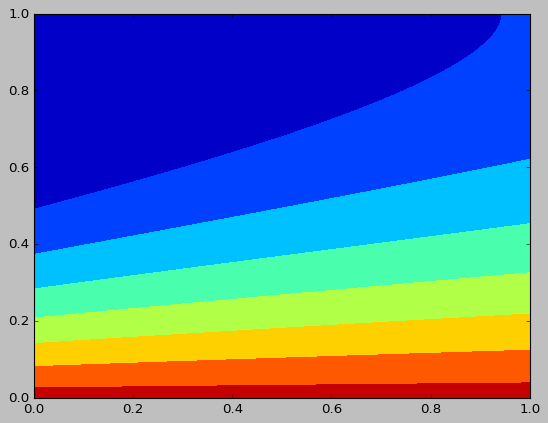

In [14]:
Z = np.array([[cost_function1(x, y) for y in ylist] for x in xlist])
plt.contourf(X, Y, Z)

In [18]:
newtons(cost_function1_v, limits, np.array([0.9, 0.6]), funcgrad=cost_function1_grad,
        funchess=cost_function1_hess, optpoint = np.array([alpha, beta]))

(array([0.99932219, 0.97358783]),
 143.16863862880157,
 {'iterations': 1,
  'funccalcs': 0,
  'gradcalcs': 1,
  'hesscalcs': 1,
  'matrixinversions': 1},
 0.6973398111943818)

In [19]:
levenmarq(cost_function1_v, limits, np.array([0.9, 0.6]), funcgrad=cost_function1_grad,
          funchess=cost_function1_hess, regulpar=1., optpoint = np.array([alpha, beta]))

(array([0.99946623, 0.98237052]),
 144.43795741728826,
 {'iterations': 1,
  'funccalcs': 0,
  'gradcalcs': 1,
  'hesscalcs': 1,
  'matrixinversions': 1},
 0.705746325342029)